In [1]:
from tensorflow.keras.datasets import mnist


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32)
X_test = X_test.reshape(-1, 28 * 28).astype(np.float32)


In [6]:
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


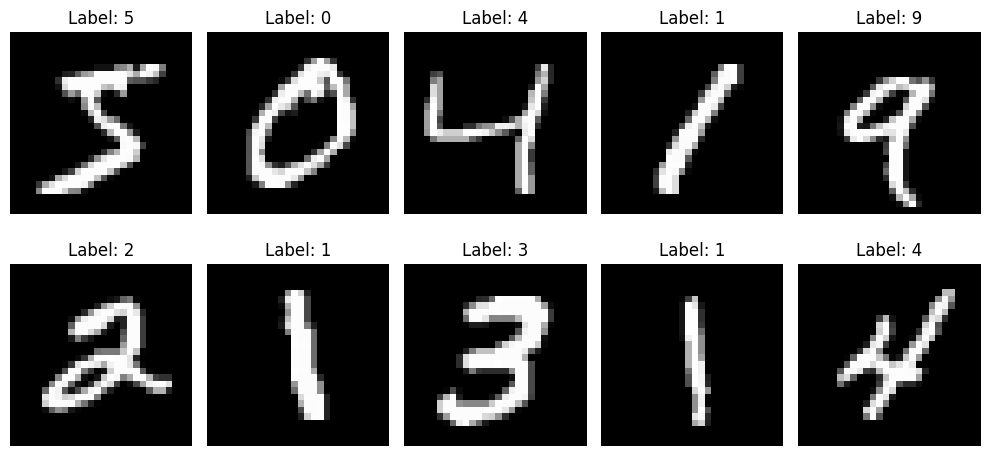

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [9]:
clf = LinearSVC(dual=False, max_iter=10)


In [10]:
clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, max_iter=10)

In [13]:
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9163


In [14]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.93      0.88      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.88      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.86      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.92     10000



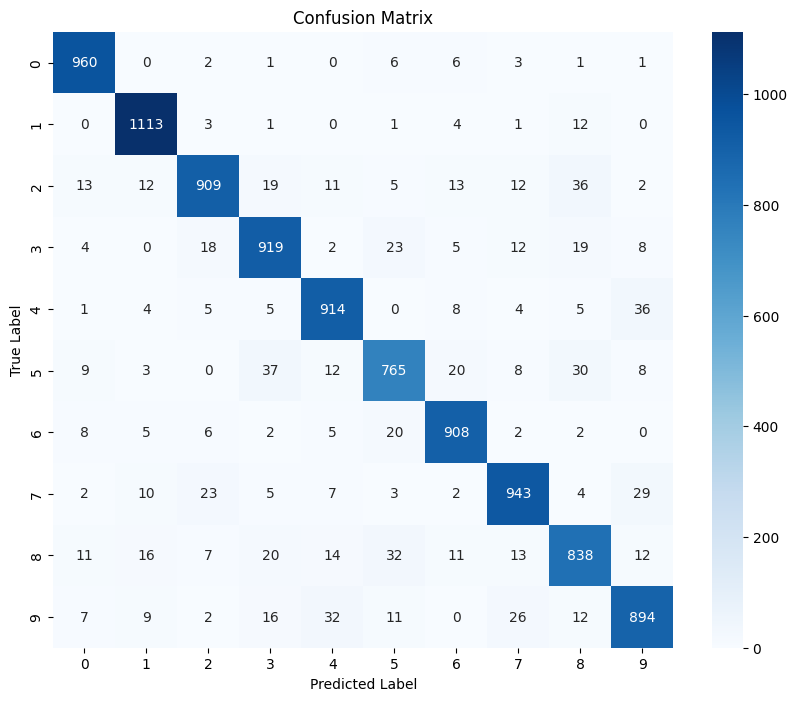

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


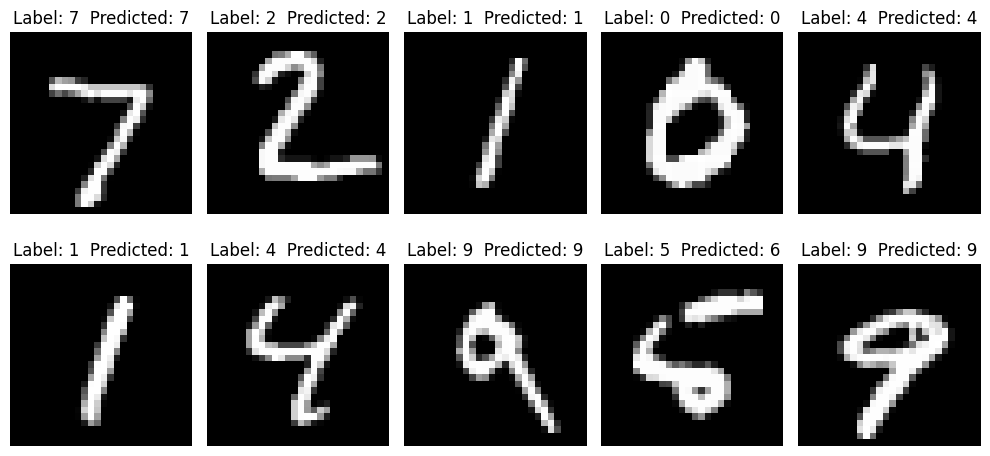

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_test[i]}  Predicted: {y_pred[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [18]:
misclassified_indices = np.where(y_test != y_pred)[0]


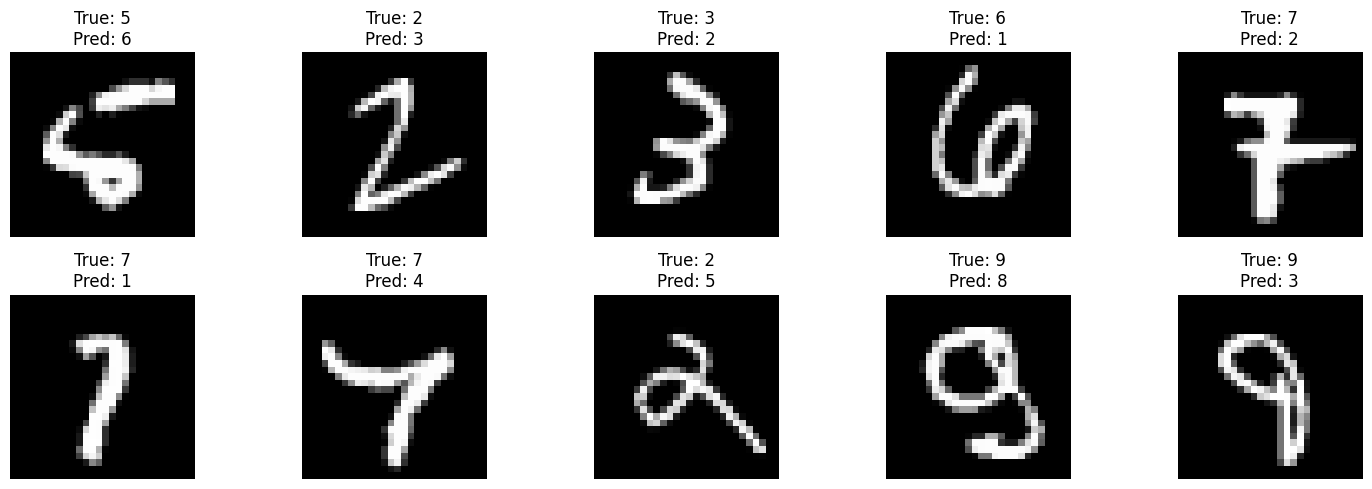

In [19]:
plt.figure(figsize=(15, 5))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[index]}\nPred: {y_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
